# Most Profitable Studios Analysis

## Recommendation

    <insert> What recommendation I'll make for Microsoft's new movie studio. 


## Step 1: 
Importing necessary tools

In [10]:
import pandas as pd
df = pd.read_csv('tmdb.movies.csv', index_col=0)
df1 = pd.read_csv('bom.movie_gross.csv')

### Step 2: 
Joining both tables on 'title' to see the actual title name instead of a code

In [11]:
frames = [df, df1]
df_concat = pd.concat(frames)
df_concat

#Create new dataframe the columns we want
new_df = df_concat[['title', 'year', 'studio', 'popularity', 'domestic_gross', 'foreign_gross']].sort_values(by='year', ascending=False)
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross
3386,An Actor Prepares,2018.0,Grav.,NaN,1700.0,NaN
3183,On the Basis of Sex,2018.0,Focus,NaN,24600000.0,13600000
3176,Tyler Perry's Acrimony,2018.0,LGF,NaN,43500000.0,2900000
3177,Mary Queen of Scots,2018.0,Focus,NaN,16500000.0,29900000
3178,The Possession of Hannah Grace,2018.0,SGem,NaN,14800000.0,28200000
...,...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,0.6,NaN,NaN
26513,_EXHIBIT_84xxx_,NaN,NaN,0.6,NaN,NaN
26514,The Last One,NaN,NaN,0.6,NaN,NaN
26515,Trailer Made,NaN,NaN,0.6,NaN,NaN


## Step 3: 
Limit results to only the past 10 years (2011)

In [12]:
# limit results to only the past 10 years (2011)
new_df = new_df.loc[new_df['year'] >= 2011] 
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross
3386,An Actor Prepares,2018.0,Grav.,NaN,1700.0,NaN
3183,On the Basis of Sex,2018.0,Focus,NaN,24600000.0,13600000
3176,Tyler Perry's Acrimony,2018.0,LGF,NaN,43500000.0,2900000
3177,Mary Queen of Scots,2018.0,Focus,NaN,16500000.0,29900000
3178,The Possession of Hannah Grace,2018.0,SGem,NaN,14800000.0,28200000
...,...,...,...,...,...,...
599,Texas Killing Fields,2011.0,Anch.,NaN,45500.0,912000
595,Page One: A Year Inside the New York Times,2011.0,Magn.,NaN,1100000.0,NaN
593,There Be Dragons,2011.0,Gold.,NaN,1100000.0,NaN
596,The Time That Remains,2011.0,IFC,NaN,32900.0,1000000


## Step 4: 
Add foreign and domestic profits together to get an internation picture of how much each movie has made. 

In [15]:
# convert the domestic gross column to a numeric column so it can be added to the foreign gross column
new_df['domestic_gross'] = pd.to_numeric(new_df['domestic_gross'])
new_df['domestic_gross'] = new_df['domestic_gross'].fillna(0)

# remove commas from foreign gross and convert to a numeric column
new_df['foreign_gross'].replace(',','', regex=True, inplace=True)
new_df['foreign_gross'] = pd.to_numeric(new_df['foreign_gross'])
new_df['foreign_gross'] = new_df['foreign_gross'].fillna(0)

# create a new column adding the domestic and foreign gross values together to show each title's total gross 
new_df['total_gross'] = new_df['domestic_gross'] + new_df['foreign_gross']
new_df[['title', 'year', 'studio', 'total_gross']]



<ipython-input-15-2bc10071996b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['domestic_gross'] = pd.to_numeric(new_df['domestic_gross'])
<ipython-input-15-2bc10071996b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['domestic_gross'] = new_df['domestic_gross'].fillna(0)
/Users/jennifersbennifers/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,title,year,studio,total_gross
3386,An Actor Prepares,2018.0,Grav.,1700.0
3183,On the Basis of Sex,2018.0,Focus,38200000.0
3176,Tyler Perry's Acrimony,2018.0,LGF,46400000.0
3177,Mary Queen of Scots,2018.0,Focus,46400000.0
3178,The Possession of Hannah Grace,2018.0,SGem,43000000.0
...,...,...,...,...
599,Texas Killing Fields,2011.0,Anch.,957500.0
595,Page One: A Year Inside the New York Times,2011.0,Magn.,1100000.0
593,There Be Dragons,2011.0,Gold.,1100000.0
596,The Time That Remains,2011.0,IFC,1032900.0


## Step 5: 


In [16]:
new_df = new_df.sort_values(by='total_gross', ascending=False)
new_df[['title', 'studio', 'total_gross', 'year']].head(10)

,title,studio,total_gross,year
727,Marvel's The Avengers,BV,1.518900e+09,2012.0
1875,Avengers: Age of Ultron,BV,1.405400e+09,2015.0
3080,Black Panther,BV,1.347000e+09,2018.0
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09,2011.0
2758,Star Wars: The Last Jedi,BV,1.332600e+09,2017.0
3081,Jurassic World: Fallen Kingdom,Uni.,1.309500e+09,2018.0
1127,Frozen,BV,1.276400e+09,2013.0
2759,Beauty and the Beast (2017),BV,1.263500e+09,2017.0
3082,Incredibles 2,BV,1.242800e+09,2018.0
1128,Iron Man 3,BV,1.214800e+09,2013.0


In [17]:
# Something to keep in mind is that Disney acquired 21st Century Fox in 2019. The data here from Fox shows movies
# that were made before 2019, so they are still considered to be made by Fox. 


In [18]:
top_studios = new_df['studio'].head(40)
top_40_gross = new_df['total_gross'].head(40)

## Visualization showing studios that produced the most profitable movies

Text(0, 0.5, 'Gross in Billions')

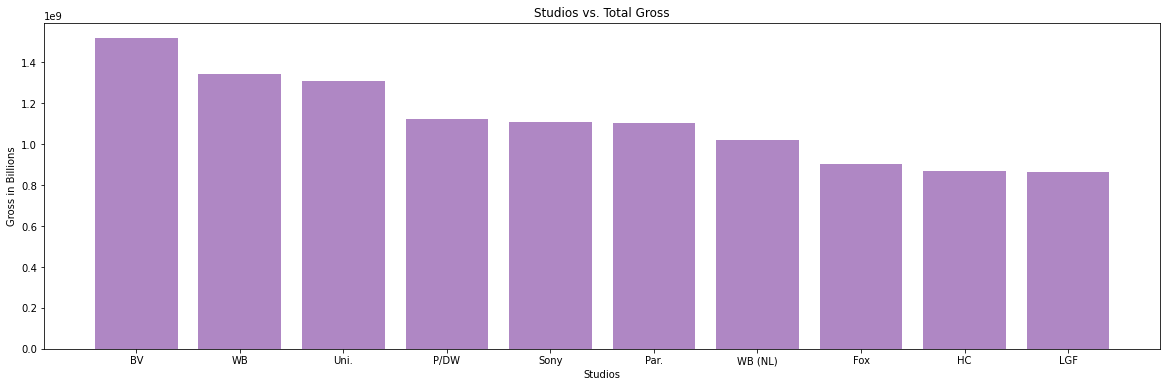

In [19]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# 10 studios that made the top 40 most profitable films in the last 10 years (foreign and domestic gross)

fig, ax = plt.subplots(figsize=(20, 6))

ax.bar(x=top_studios, height=top_40_gross, color='#af87c4')

ax.set_title('Studios vs. Total Gross')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross in Billions')

## Show which studios grossed the most money in the past 10 years
    Likely using .pivot method

In [20]:
studio_list = list(new_df[['studio']].value_counts().index)
studio_list
# Breakdown of who each studio is: 
# BV = Disney 
# WB = Warner Brothers 
# Uni. = Universal Studios
# Sony = Sony
# Fox = Fox
# WB (NL) = Warner Brothers Netherlands
# Par. = Paramount Pictures 
# P/DW = Paramount Pictures / DreamWorks
# LGF = Lionsgate Films
# LG/S = Lionsgate / Summit Entertainment 
# HC = China Film Group

[('IFC',),
 ('Uni.',),
 ('WB',),
 ('Magn.',),
 ('Fox',),
 ('SPC',),
 ('Sony',),
 ('BV',),
 ('Par.',),
 ('LGF',),
 ('Eros',),
 ('Wein.',),
 ('CL',),
 ('RAtt.',),
 ('KL',),
 ('Strand',),
 ('FoxS',),
 ('WGUSA',),
 ('CJ',),
 ('Focus',),
 ('A24',),
 ('MBox',),
 ('UTV',),
 ('WB (NL)',),
 ('LG/S',),
 ('FM',),
 ('Cohen',),
 ('ORF',),
 ('Rela.',),
 ('SGem',),
 ('FIP',),
 ('STX',),
 ('TriS',),
 ('RTWC',),
 ('GK',),
 ('MNE',),
 ('BST',),
 ('EOne',),
 ('Distrib.',),
 ('Gold.',),
 ('Drft.',),
 ('Osci.',),
 ('BG',),
 ('CBS',),
 ('FD',),
 ('Relbig.',),
 ('Trib.',),
 ('Orch.',),
 ('Zeit.',),
 ('FUN',),
 ('W/Dim.',),
 ('FCW',),
 ('FRun',),
 ('Yash',),
 ('Anch.',),
 ('PNT',),
 ('Elev.',),
 ('Vari.',),
 ('Fathom',),
 ('FR',),
 ('Free',),
 ('VE',),
 ('CGld',),
 ('Sum.',),
 ('Abr.',),
 ('Scre.',),
 ('Cdgm.',),
 ('NGE',),
 ('Amazon',),
 ('Lorb.',),
 ('Rialto',),
 ('Annapurna',),
 ('TFA',),
 ('PFR',),
 ('LGP',),
 ('AF',),
 ('Vita.',),
 ('Mont.',),
 ('Jan.',),
 ('P/DW',),
 ('Ampl.',),
 ('Alc',),
 ('VPD',),
 (